In [12]:
! pip install accelerate diffusers controlnet_aux

In [16]:
import torch
from controlnet_aux import CannyDetector
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image,make_image_grid

In [18]:
controlnet = ControlNetModel.from_pretrained( "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, varient="fp16")

pipe = StableDiffusionControlNetPipeline.from_pretrained( "Yntec/AbsoluteReality", controlnet=controlnet, torch_dtype=torch.float16)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [19]:
pipe.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter_sd15.bin")

pipe.enable_model_cpu_offload()

ip-adapter_sd15.bin:   0%|          | 0.00/44.6M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.53G [00:00<?, ?B/s]

In [34]:
from google.colab import files
files.upload()

print("upload is done")

Saving ghy2.jpg to ghy2.jpg
upload is done


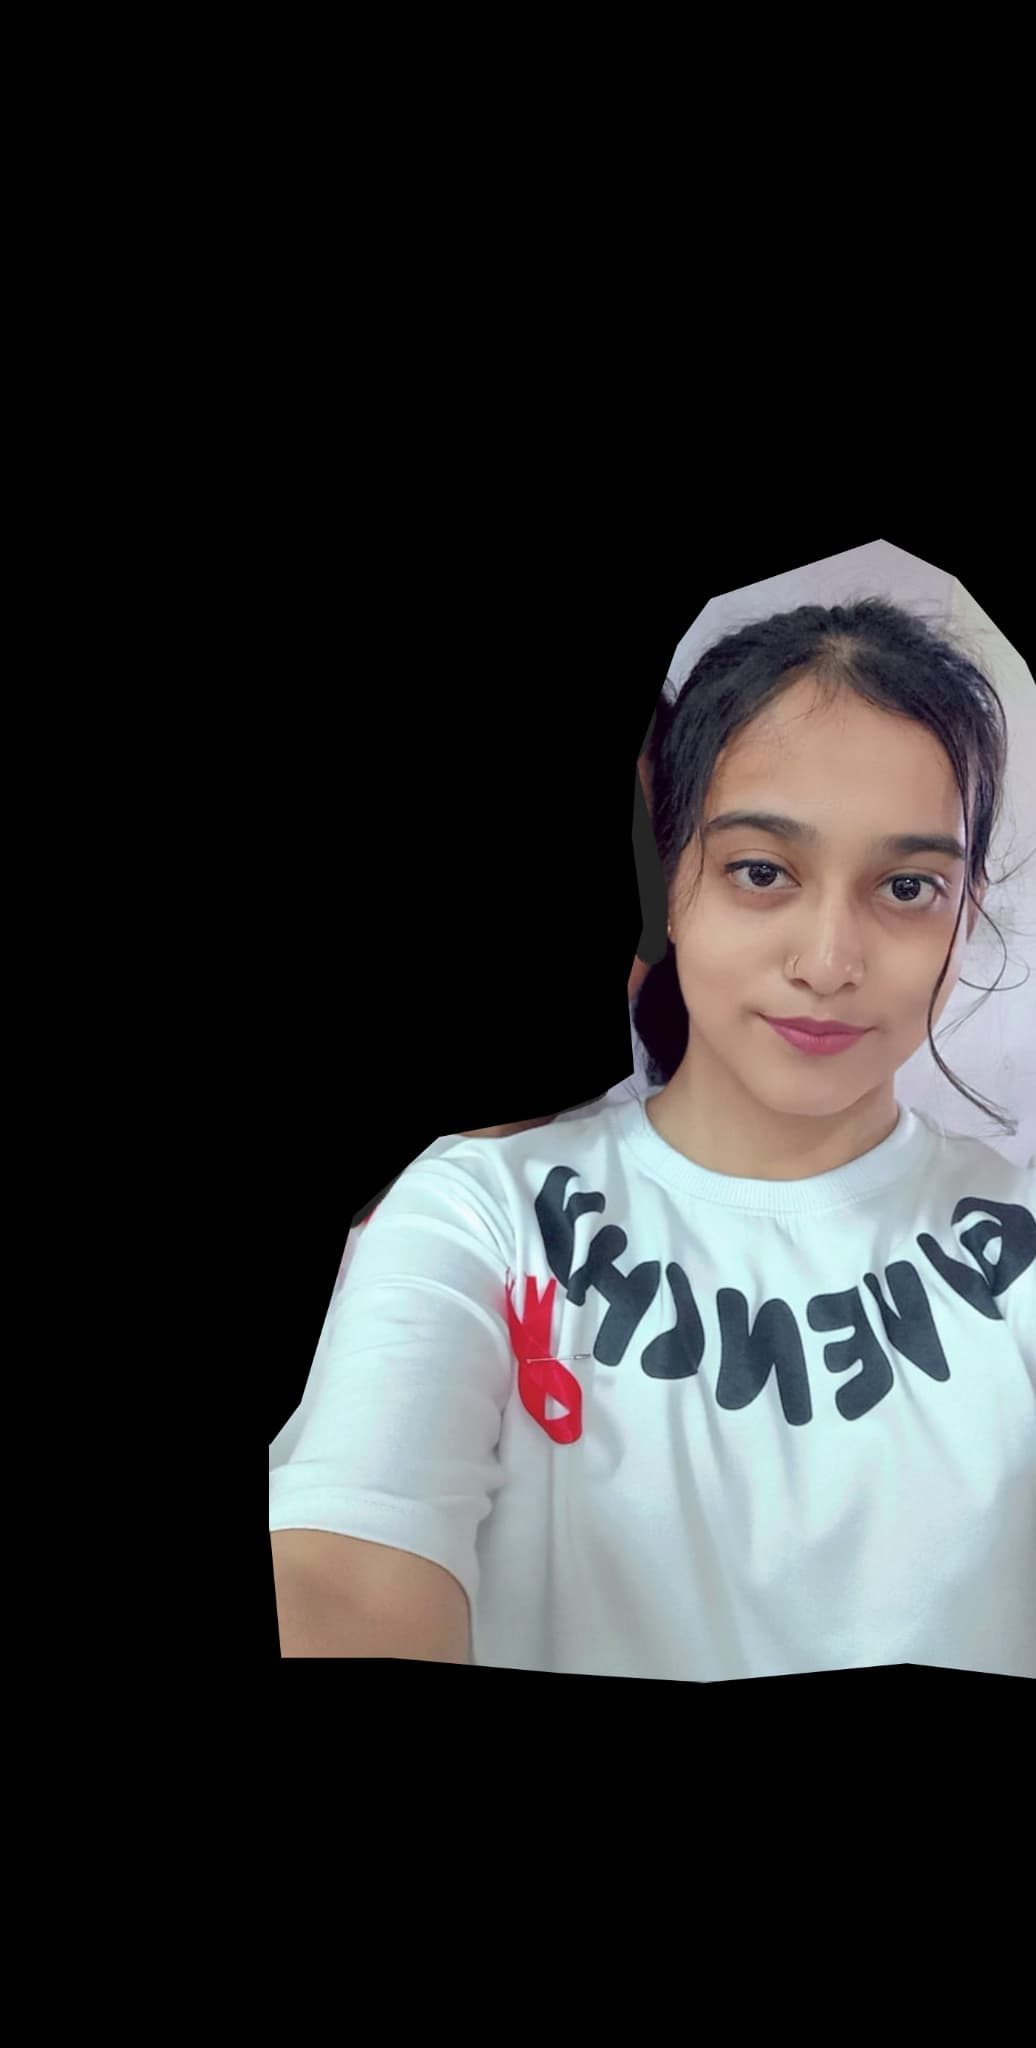

In [33]:
img = load_image("ed.jpg")
img

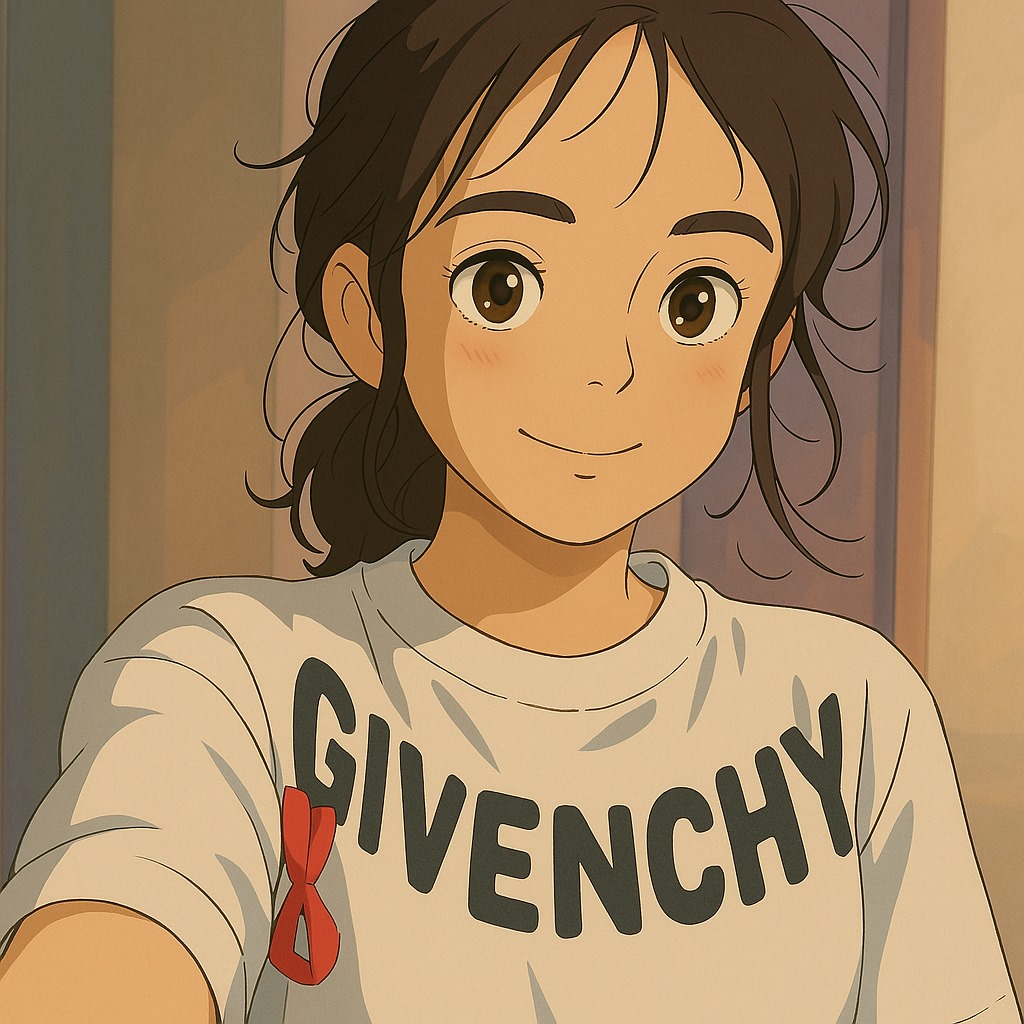

In [35]:
ip_adap_img = load_image("gh2.jpg")
ip_adap_img

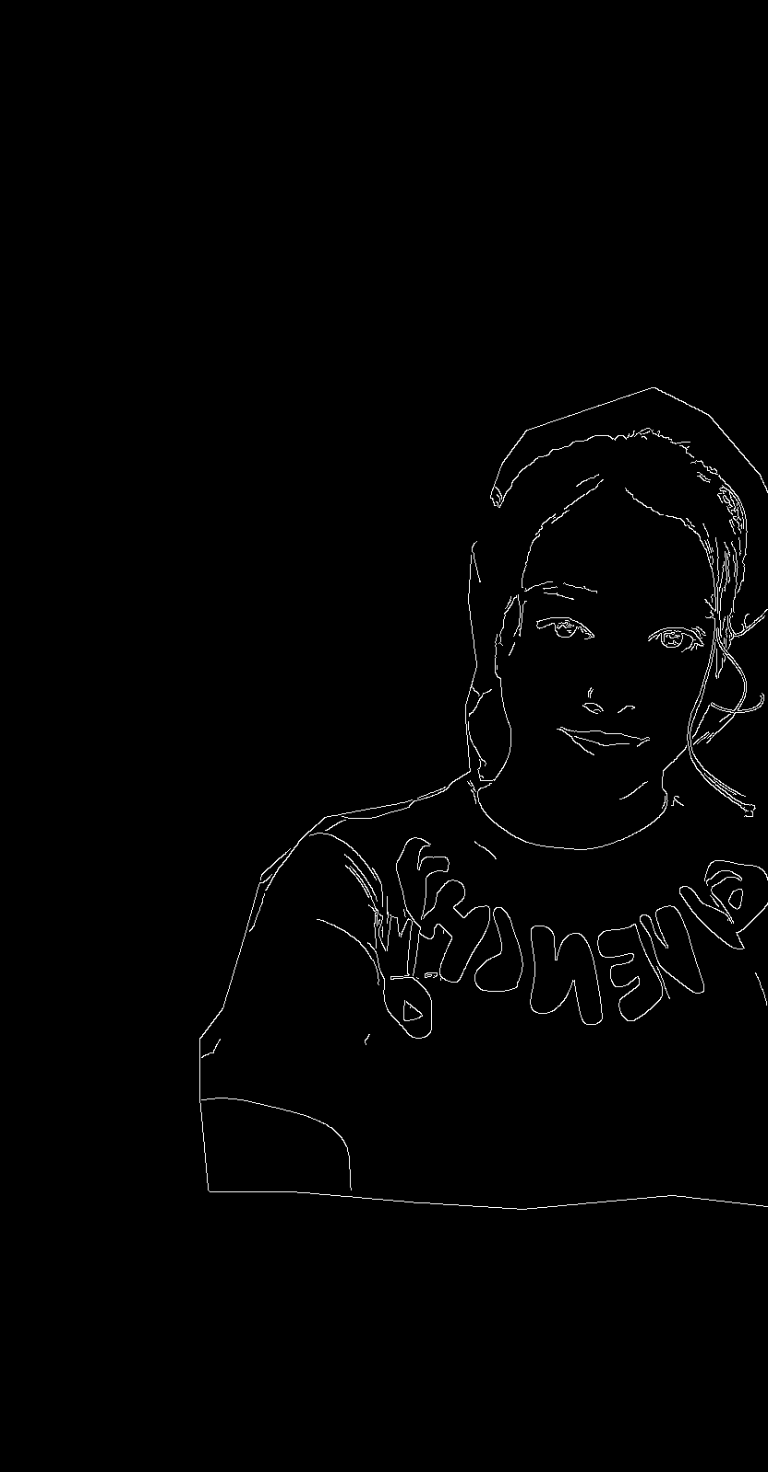

In [41]:
canny = CannyDetector()
canny_img = canny(img,detect_resolution=812,image_resolution=768)
canny_img

In [38]:
prompt = """ (photorealistic:0.5), raw, clean shaved rusty,rounded hairtip, 2d cartoon style, keep the dress color exact, 512px,chrome yellow palette, smooth palette, nose will be small,starting from the eyebrow,,rounded faces,ghibli studio, pastel images, muted color,round eyes much closer to eyebrows, pronounced nosebridge, longer nose, eyes bigger, less round, maintain expression"""

pipe.set_ip_adapter_scale(0.5)

images = pipe(prompt = prompt,
              negative_prompt = "detailed face, high quality,chiseled, bright colors", height = 768, width = 768, ip_adapter_image = ip_adap_img, image = canny_img, guidance_scale = 9.5, controlnet_conditioning_scale = 0.6, num_inference_steps = 20, num_images_per_prompt = 3).images

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['nose, eyes bigger, less round, maintain expression']


  0%|          | 0/20 [00:00<?, ?it/s]

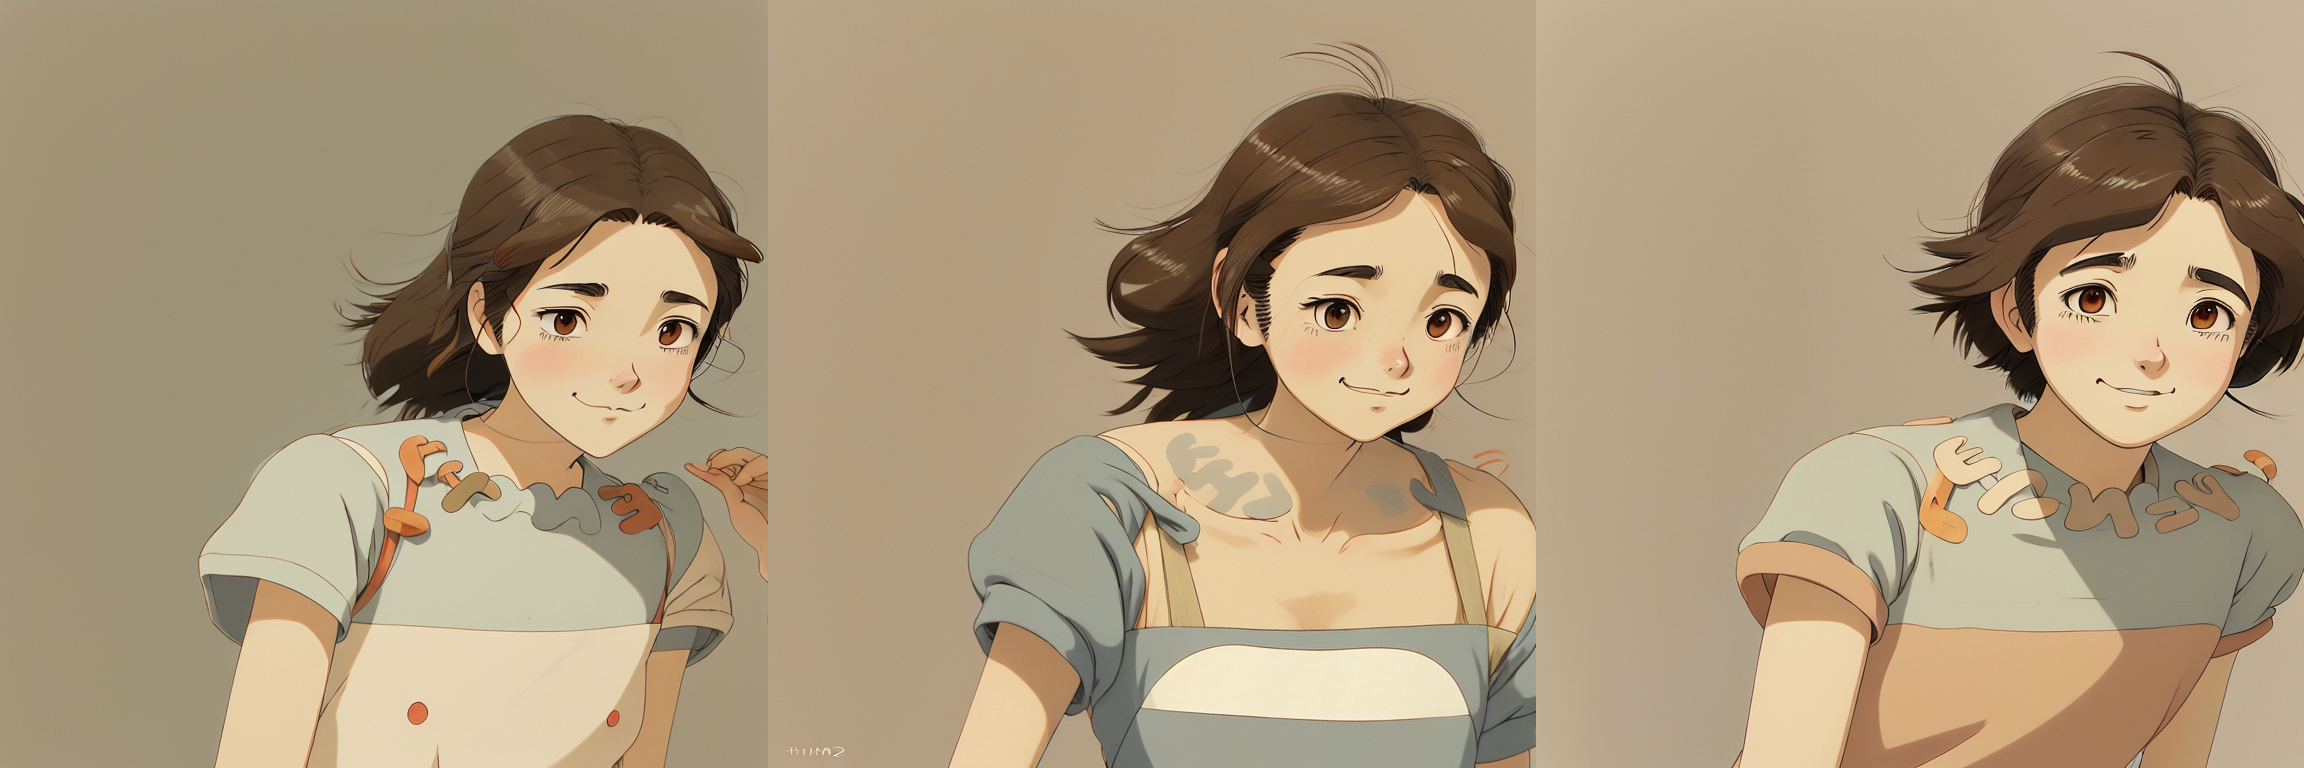

In [39]:

make_image_grid(images,cols=3,rows=1)